# Figures for the paper

In [1]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
%matplotlib inline

In [2]:
import PIL.Image as Image
import pickle

In [3]:
def plot_trace(data,t,ax=None,c='C0',band= None):
    if ax is None:
        ax = gca()
    vtracso = data*1.0
    vtracso.sort(axis=1)
    ax.plot(t,vtracso[:,250],c)
    if band == 0:
        pass
    elif band == 1:
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    elif band ==2:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
    else:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    return(ax)

In [4]:
from matplotlib.patches import ConnectionPatch

In [5]:
def getint(x):
    xc = x*1.0
    xc.sort()
    sh = xc.shape[0]
    xmed = xc[sh//2]
    s0= int(sh*(1-.6827)/2)
    s1 = sh-s0
    x0 = xc[s0]
    x1 = xc[s1]
    s0b= int(sh*(1-.95)/2)
    s1b = sh-s0b
    x0b = xc[s0b]
    x1b = xc[s1b]
    return((xmed,x0,x1,x0b,x1b))

In [6]:
with open("/mnt/data/gatinginfovslv2_temp.pickle","rb") as f:
    aps = pickle.load(f)

In [7]:
dsv = array([1,2,3,4,5,6,7,8,9])*7.5
dsvc = list(-1.0*dsv); dsvc.reverse()
dsv = concatenate((dsvc,[0],dsv))
print(dsv,dsv.shape)

[-67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.    7.5  15.
  22.5  30.   37.5  45.   52.5  60.   67.5] (19,)


In [8]:
labels = ['Vspine','Vsoma','Vdendrite','Ca']
EL0s = [-70,-70,-70,0]
nr = 1
shle = {}
shle0 = {}
for lab in labels:
    shle[lab] = zeros((19,11))
    shle0[lab] = zeros((19,11))
    
#shle['Vspine'] = zeros((19,11))#shle['Vsoma'] = zeros((19,11))#shle['Vdendrite'] = zeros((19,11))#shle['Ca'] = zeros((19,11))

for il,lab in enumerate(labels):
    EL0 = EL0s[il]
    # columns: no inh, shaft inh, axo-spinal inh
    ap0 = aps[(lab,0.0,0)]-EL0
    for i in range(1,nr):
        ap0 = row_stack((ap0,aps[(lab,0.0,i)]-EL0))

    #Effect very close to inh
    r0shaft = ap0[:,1]/ap0[:,0]
    r0axspi = ap0[:,2]/ap0[:,0]
    for j,dss in enumerate(dsv):
        ap = aps[(lab,dss,0)]-EL0
        for i in range(1,nr):
            ap = row_stack((ap,aps[(lab,dss,i)]-EL0))
        rshaft = ap[:,1]/ap[:,0]
        raxspi = ap[:,2]/ap[:,0]
        difr = column_stack(((1-rshaft)/(1-r0shaft),(1-raxspi)/(1-r0axspi)))
        # difr = column_stack((rshaft,raxspi))
        shle0[lab][j,1:] = concatenate((getint(difr[:,0]),getint(difr[:,1])))
        shle0[lab][j,0] = dss
        difr[:,0] = difr[:,0]*(1-r0shaft)
        difr[:,1] = difr[:,1]*(1-r0axspi)
        shle[lab][j,1:] = concatenate((getint(difr[:,0]),getint(difr[:,1])))
        shle[lab][j,0] = dss


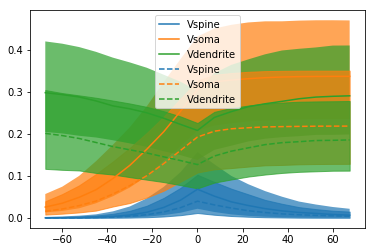

In [9]:
axsp = 0
for lab in labels[:-1]:
    plot(shle[lab][:,0],shle[lab][:,1+axsp*5],label=lab)
    fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7)
    
axsp = 1
for i,lab in enumerate(labels[:-1]):
    plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'C'+str(i)+'--',label=lab)
    fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],color='C'+str(i),alpha=0.7)
    
legend()

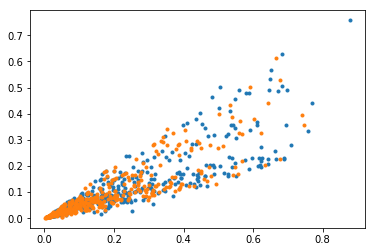

In [10]:
plot(1-ap0[:,1]/ap0[:,0],1-ap[:,1]/ap[:,0],'.')
plot(1-ap0[:,2]/ap0[:,0],1-ap[:,2]/ap[:,0],'.')

In [11]:

with open("/mnt/data/gatinginfovslv2_temp.pickle","rb") as f:
    aph = pickle.load(f)
    

In [12]:
labels = ['Vspine','Vsoma','Vdendrite','Ca']
EL0s = [-70,-70,-70,0]
nr = 1
shleh = {}
shleh0 = {}
for lab in labels:
    shleh[lab] = zeros((19,11))
    shleh0[lab] = zeros((19,11))

#shle['Vspine'] = zeros((19,11))#shle['Vsoma'] = zeros((19,11))#shle['Vdendrite'] = zeros((19,11))#shle['Ca'] = zeros((19,11))

for il,lab in enumerate(labels):
    EL0 = EL0s[il]
    # columns: no inh, shaft inh, axo-spinal inh
    ap0 = aph[(lab,0.0,0)]-EL0
    for i in range(1,nr):
        ap0 = row_stack((ap0,aps[(lab,0.0,i)]-EL0))

    #Effect very close to inh
    r0shaft = ap0[:,1]/ap0[:,0]
    r0axspi = ap0[:,2]/ap0[:,0]
    for j,dss in enumerate(dsv):
        ap = aph[(lab,dss,0)]-EL0
        for i in range(1,nr):
            ap = row_stack((ap,aph[(lab,dss,i)]-EL0))
        rshaft = ap[:,1]/ap[:,0]
        raxspi = ap[:,2]/ap[:,0]
        difr = column_stack(((1-rshaft)/(1-r0shaft),(1-raxspi)/(1-r0axspi)))
        # difr = column_stack((rshaft,raxspi))
        shleh0[lab][j,1:] = concatenate((getint(difr[:,0]),getint(difr[:,1])))
        shleh0[lab][j,0] = dss
        difr[:,0] = difr[:,0]*(1-r0shaft)
        difr[:,1] = difr[:,1]*(1-r0axspi)
        shleh[lab][j,1:] = concatenate((getint(difr[:,0]),getint(difr[:,1])))
        shleh[lab][j,0] = dss

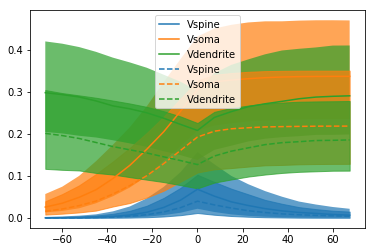

In [13]:
axsp = 0
for lab in labels[:-1]:
    plot(shleh[lab][:,0],shleh[lab][:,1+axsp*5],label=lab)
    fill_between(shleh[lab][:,0],shleh[lab][:,2+axsp*5],shleh[lab][:,3+axsp*5],alpha=0.7)
    
axsp = 1
for i,lab in enumerate(labels[:-1]):
    plot(shleh[lab][:,0],shleh[lab][:,1+axsp*5],'C'+str(i)+'--',label=lab)
    fill_between(shleh[lab][:,0],shleh[lab][:,2+axsp*5],shleh[lab][:,3+axsp*5],color='C'+str(i),alpha=0.7)
    
legend()

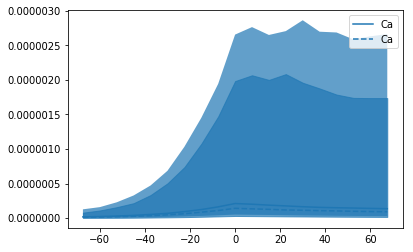

In [14]:
axsp = 0
for lab in labels[-1:]:
    plot(shleh[lab][:,0],shleh[lab][:,1+axsp*5],label=lab)
    fill_between(shleh[lab][:,0],shleh[lab][:,2+axsp*5],shleh[lab][:,3+axsp*5],alpha=0.7)
    
axsp = 1
for i,lab in enumerate(labels[-1:]):
    plot(shleh[lab][:,0],shleh[lab][:,1+axsp*5],'C'+str(i)+'--',label=lab)
    fill_between(shleh[lab][:,0],shleh[lab][:,2+axsp*5],shleh[lab][:,3+axsp*5],color='C'+str(i),alpha=0.7)
    
legend()

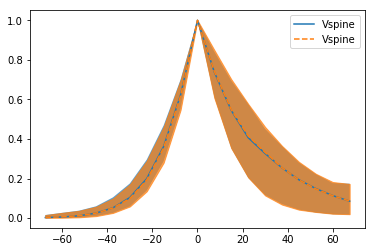

In [15]:
axsp = 0
for lab in labels[:1]:
    plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],label=lab)
    fill_between(shleh0[lab][:,0],shleh0[lab][:,2+axsp*5],shleh0[lab][:,3+axsp*5],alpha=0.7)
    
axsp = 1
for i,lab in enumerate(labels[:1]):
    plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],'C'+str(i+1)+'--',label=lab)
    fill_between(shleh0[lab][:,0],shleh0[lab][:,2+axsp*5],shleh0[lab][:,3+axsp*5],color='C'+str(i+1),alpha=0.7)
    
legend()

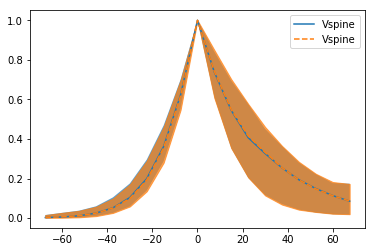

In [16]:
axsp = 0
for lab in labels[:1]:
    plot(shle0[lab][:,0],shle0[lab][:,1+axsp*5],label=lab)
    fill_between(shle0[lab][:,0],shle0[lab][:,2+axsp*5],shle0[lab][:,3+axsp*5],alpha=0.7)
    
axsp = 1
for i,lab in enumerate(labels[:1]):
    plot(shle0[lab][:,0],shle0[lab][:,1+axsp*5],'C'+str(i+1)+'--',label=lab)
    fill_between(shle0[lab][:,0],shle0[lab][:,2+axsp*5],shle0[lab][:,3+axsp*5],color='C'+str(i+1),alpha=0.7)
    
legend()

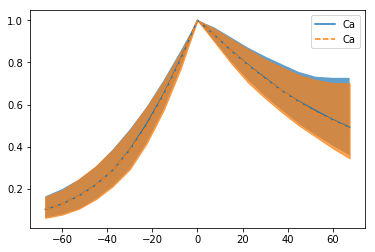

In [17]:
axsp = 0
for lab in labels[-1:]:
    plot(shle0[lab][:,0],shle0[lab][:,1+axsp*5],label=lab)
    fill_between(shle0[lab][:,0],shle0[lab][:,2+axsp*5],shle0[lab][:,3+axsp*5],alpha=0.7)
    
axsp = 1
for i,lab in enumerate(labels[-1:]):
    plot(shle0[lab][:,0],shle0[lab][:,1+axsp*5],'C'+str(i+1)+'--',label=lab)
    fill_between(shle0[lab][:,0],shle0[lab][:,2+axsp*5],shle0[lab][:,3+axsp*5],color='C'+str(i+1),alpha=0.7)
    
legend()

In [18]:
with open("gatinginfo_lengthv2.pickle","wb") as f:
    pickle.dump([shle,shleh,shle0,shleh0],f)
    